###### import required files

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
import sys
from imp import reload
import numpy as np
import pandas as pd
# A2 codes
import A2_codes.data_formater as A2_formater

warnings.filterwarnings('ignore')

In [38]:
reload(A2_formater )

<module 'A2_codes.data_formater' from 'C:\\Users\\Administrator\\Desktop\\workspace\\UTS_ML2019_99151300\\A2_codes\\data_formater.py'>

# Movie Recommendation Model for Netflix Dataset

 Jingyi Wu 99151300

# Introduction


# Exploration

Netflix price dataset contains seven files include the ratings of users give to each movie with its date and the movie information include their publish date and name.  Since the initial format of dataset is not suitable for exploring, so my first step is to format it into tubule data for carry out subsequence of data mining and modelling works. 

In [3]:
df = pd.read_csv('./dataset/netflix-prize-data/combined_data_1.txt', 
                 header = None, names = ['user', 'rating','date'], 
                 usecols = [0,1,2])

In [138]:
movie_title_df = pd.read_csv('./dataset/netflix-prize-data/movie_titles.csv',
                             encoding = "ISO-8859-1",
                             header = None, names = ['movie','publish', 'title'], 
                             usecols = [0,1,2])

In [139]:
# the user id with empty rating and date is the movie id
df.head(5)

,user,rating,date
0,1:,NaN,NaN
1,1488844,3.0,2005-09-06
2,822109,5.0,2005-05-13
3,885013,4.0,2005-10-19
4,30878,4.0,2005-12-26


In [140]:
movie_title_df.head(5)

,movie,publish,title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [49]:
# slice movie by empty rows
sliced_df = A2_formater.slice_movie(df)

# format data type
sliced_df['date']= pd.to_datetime(sliced_df['date'])
sliced_df['rating']=sliced_df['rating'].astype(float)
sliced_df['movie']=sliced_df['movie'].astype(int)
sliced_df['user']=sliced_df['user'].astype(int)

In [146]:
movie_title_df['publish'][~(movie_title_df['publish'].isna())].mean()

1990.2636941958003

In [147]:
movie_title_df['movie']=movie_title_df['movie'].astype(int)
movie_title_df[movie_title_df['publish'].isna()] = movie_title_df['publish'][~(movie_title_df['publish'].isna())].mean() # fill missing
movie_title_df['publish']= pd.to_datetime(movie_title_df['publish'].astype(int), format ='%Y' )
combine_df = sliced_df.merge(movie_title_df[['publish','movie']],on='movie')
combine_df.head(5)

,user,rating,date,movie,publish
0,1488844,3.0,2005-09-06,1,2003-01-01
1,822109,5.0,2005-05-13,1,2003-01-01
2,885013,4.0,2005-10-19,1,2003-01-01
3,30878,4.0,2005-12-26,1,2003-01-01
4,823519,3.0,2004-05-03,1,2003-01-01


In [133]:
print("Data length: ",len(combine_df))

Data length:  24053764


After formatted dataset, we got 24053764 count of tabule data, and it contains five attributes: movie id, user id, rating of user give to movie, date of rating record, and movie publish year. 

------------------------
### user
- Type: Numeric categories

The id of users, after drop duplicates we can seen that dataset contains 470758 different users. most users are rated 10~50 movies, only few of them had rating over 2000 movies.

Length:  470758


{'whiskers': [<matplotlib.lines.Line2D at 0x2462b2ddeb8>,
 'caps': [<matplotlib.lines.Line2D at 0x2462b2e7588>,
 'boxes': [<matplotlib.lines.Line2D at 0x2462b2dda90>],
 'medians': [<matplotlib.lines.Line2D at 0x2462b2e7c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x2462b2e7f60>],
 'means': []}

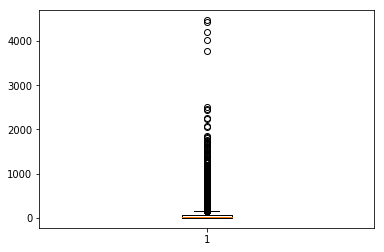

In [100]:
users_rating_count = sliced_df.groupby('user')['user'].agg(['count']).reset_index()
print("Length: ",len(users_rating_count))
plt.boxplot(users_rating_count['count'].astype(int))

         binned   count
0        (0, 1]   15225
1       (1, 10]  124902
2      (10, 50]  184967
3     (50, 100]   75394
4   (100, 1000]   70185
5  (1000, 2000]      73
6  (2000, 5000]      12


<BarContainer object of 7 artists>

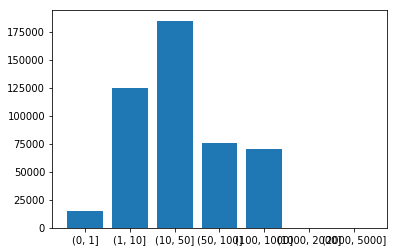

In [101]:
bins = [0,1,10,50,100,1000,2000,5000]
users_rating_count['binned'] = pd.cut(users_rating_count['count'], bins)
user_activity_bin = users_rating_count.groupby('binned')['binned'].agg(['count']).reset_index()
print(user_activity_bin)
plt.bar(user_activity_bin['binned'].astype(str),user_activity_bin['count'])

### movie
- Type: Numeric categories

The id of movie,  after drop duplicates we can seen that dataset contains 4499 different movie. And this id is formated in a complete ordered sequence from 1 to 4499.And most movies have limite rating records.

Number of moves:  4499
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


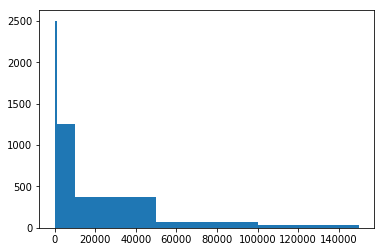

In [106]:
movie_popularity = sliced_df.groupby('movie')['movie'].agg(['count']).reset_index()
plt.hist(movie_popularity['count'],bins=[0,100,1000,10000,50000,100000,150000])
print("Number of moves: ",len(movie_popularity ))
print(list(movie_popularity['movie'][:100]))

### rating
- Type: Numeric ordinal
- Value range: 1,2,3,4,5

The rating of user give to the movie, most values are around 4, and only few values are rating one. 

In [79]:
print("rating min: ",sliced_df['rating'].min()," max: ",sliced_df['rating'].max()," mode: ", sliced_df['rating'].mode())

rating min:  1.0  max:  5.0  mode:  0    4.0
dtype: float64


   rating    count
0     1.0  1118186
1     2.0  2439073
2     3.0  6904181
3     4.0  8085741
4     5.0  5506583


<BarContainer object of 5 artists>

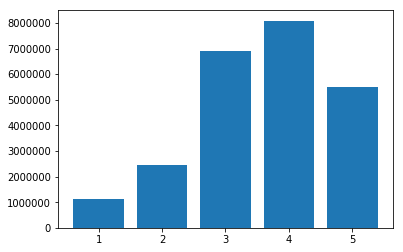

In [75]:
rating_distr = sliced_df.groupby('rating')['rating'].agg(['count']).reset_index()
print(rating_distr)
plt.bar(rating_distr["rating"],rating_distr["count"])

### date
- Type: Ordinal Date
- Value range: 1999-11-11 ~ 2005-12-31

The timestamp of the user rating the movie. along with the time progresses, the rating data have rapid growth

In [80]:
print("date min: ",sliced_df['date'].min()," max: ",sliced_df['date'].max())

date min:  1999-11-11 00:00:00  max:  2005-12-31 00:00:00


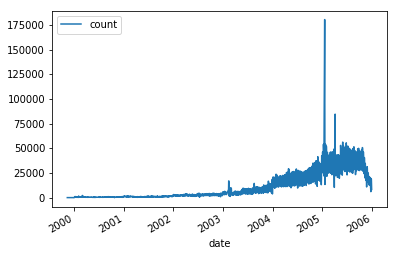

In [99]:
date_distr = sliced_df.groupby('date')['date'].agg(['count']).reset_index().set_index('date')
date_distr.plot()

### publish
- Type: Ordinal Date
- Value range: 1915-01-01 ~ 2005-01-01

The movie publish time, it shows most movies in dataset are close to the time of dataset published, and new movies rapidly increase by year.

In [148]:
print("publish min: ",combine_df.min()," max: ",combine_df['publish'].max())

publish min:  1915-01-01 00:00:00  max:  2005-01-01 00:00:00


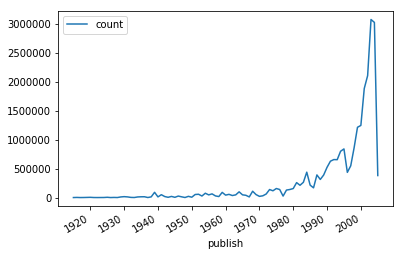

In [155]:
# publish_distr = combine_df.groupby('publish')['publish'].agg(['count']).reset_index().set_index('publish')
publish_distr.plot()
plt.show()

# Methodology



# Evaluation

## Off-line Experimental Setting
accuracy
coverage
serendipity
real-time
### Metrics
####    Root mean squared error
 $\operatorname { RMSE } =  { \sqrt{ \frac{1}{|\mathcal{T}|}{ \sum _ { ( u , i ) \in T } \left( r _ { u i } - \hat { r } _ { u i } \right) ^ { 2 } } }} $

In [7]:
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

####   Mean absolute error
$\mathrm{MAE}=\frac{1}{|\mathcal{T}|} \sum_{(u, i) \in \mathcal{T}}\left|\hat{r}_{u i}-r_{u i}\right|$

In [8]:
def mae(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    absError = abs(prediction - ground_truth)
    return sum(absError) / len(absError)

# Ethical

In [ ]:
privacy

spread bad information 


# Conclusion

# Rererence



# Appendix

load and format data: https://github.com/SnowWindSaveYou/UTS_ML2019_99151300/blob/master/A2%20Data%20__init__.ipynb

Explore data: https://github.com/SnowWindSaveYou/UTS_ML2019_99151300/blob/master/A2_exploration_and_modeling.ipynb


RBM
MF